In [1]:
import numpy as np
from scipy import optimize
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LinearRegression
import pandas as pd
import helpers
import scipy
import itertools

### Ex. 1 

In [2]:
def return_BA(n, m, k, return_intermediate_steps=False):
    am = np.zeros((m+n, m+n))
    for i in range(n):
        for j in range(n):
            if i > j: 
                am[i, j] = 1
    ams = [am.copy()]
    for i in range(n, m+n): 
        probs = am.sum(axis=1)[:i]
        nodes_to_connect = np.random.choice(np.arange(i), p=probs/probs.sum(), size=(k,), replace=False)
        for node in nodes_to_connect: 
            am[i, node] = 1
        ams.append(am.copy())
    if return_intermediate_steps:
        return nx.from_numpy_array(am), ams
    else: 
        return nx.from_numpy_array(am)
n = 5
m = 200
k = 3
g, ams = return_BA(n, m, k, return_intermediate_steps=True)

### Ex. 2, 3 

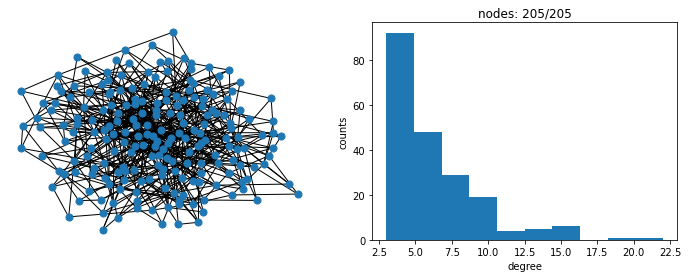

In [3]:
import matplotlib.animation
fig, axs = plt.subplots(ncols=2, figsize=(12,4))


def update(num):
    axs[0].clear()
    axs[1].clear()
    am = ams[num][:n+num, :n+num]
    G = nx.from_numpy_array(am)
    nx.draw(G, ax=axs[0], with_labels=False, node_size=50, pos=nx.spring_layout(G))
    axs[1].hist(nx.adjacency_matrix(G).toarray().sum(axis=1))
    axs[1].set_xlabel('degree')
    axs[1].set_ylabel('counts')
    axs[1].set_title(f'nodes: {n+num}/{n+m}')
    

ani = matplotlib.animation.FuncAnimation(fig, update, frames=m+1, interval=10000, repeat=True)

ani.save('BA.gif', writer=matplotlib.animation.PillowWriter(fps=5))

plt.show()

In [4]:
from helpers import MLE_alpha
MLE_alpha(np.array(list(dict(g.degree()).values())))

2.7927210365954784

In [5]:
degrees = [nx.adjacency_matrix(nx.from_numpy_matrix(am)).toarray().sum(axis=1) for am in ams]

In [6]:
times = np.arange(m)

In [7]:
t_i = 6

### Ex. 5

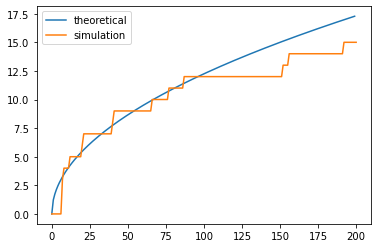

In [8]:
plt.plot(k*np.sqrt(times/t_i), label='theoretical')
plt.plot([degree[t_i+n] for degree in degrees], label='simulation')
plt.legend(); 

### P6.1

$$\frac{dk_i}{dt}=\frac{m}{t}$$

$$dk_i = \frac{m}{t}dt$$

$$t=t_i 	\rightarrow k_i(t_i)=m 	$$


$$m=mln(t_i)+C \rightarrow C=m(1-ln(t_i))$$

$$k_i(t) = mln(t)+m+mln(\frac{1}{t_i})=mln(\frac{t}{t_i})+m$$

$$t_i = te^{1-\frac{k}{m}}$$

$$P(k) = 1 - e^{1-\frac{k}{m}}$$

$$p_k = \frac{dP(k)}{dk} = \frac{e}{m} e^{\frac{k}{m}}$$

### P6.2

### P6.3

In [9]:
def return_model_a(n, m, k, return_intermediate_steps=False): 
    am = np.zeros((m+n, m+n))
    for i in range(n):
        for j in range(n):
            if i > j: 
                am[i, j] = 1
    ams = [am.copy()]
    for i in range(n, m+n): 
        nodes_to_connect = np.random.choice(np.arange(i), size=(k,), replace=False)
        for node in nodes_to_connect: 
            am[i, node] = 1
        ams.append(am.copy())
    if return_intermediate_steps:
        return nx.from_numpy_array(am), ams
    else: 
        return nx.from_numpy_array(am)
g_a, ams_a = return_model_a(n, m, k, return_intermediate_steps=True)

In [70]:
ks = np.arange(max(dict(g_a.degree()).values()))
ps = np.exp(1)/3 * np.exp(-ks/3)

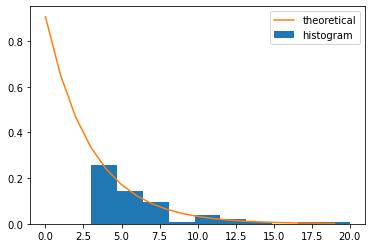

In [71]:
plt.hist(list(dict(g_a.degree()).values()), density=True, label='histogram')
plt.plot(ks, ps, label='theoretical')
_ = plt.legend()

### P6.4

In [63]:
def return_model_b(n, m, t, k=1, return_intermediate_steps=False): 
    am = np.zeros((m+n, m+n))
    for i in range(n):
        for j in range(n):
            if i > j: 
                am[i, j] = 1
    if return_intermediate_steps: 
        ams = [am.copy()]
    for _ in range(t):
        node_idx = np.random.randint(0, m+n)
        probs = am.sum(axis=1) 
        probs = np.array([1 if not degree else degree for degree in probs])
        for idx in np.arange(m+n): 
            if am[node_idx, idx] + am[node_idx, idx] > 0: 
                probs[idx] = 0
        probs[node_idx] = 0
        nodes_to_connect = np.random.choice(np.arange(m+n), p=probs/probs.sum(), size=(k,), replace=False)
        for node in nodes_to_connect: 
            am[node_idx, node] = 1
        if return_intermediate_steps:
            ams.append(am.copy())
    if return_intermediate_steps:
        return nx.from_numpy_array(am), ams
    else: 
        return nx.from_numpy_array(am)

n = 0
m = 200
t = m*(m-1)//2
k = 1
print(f't: {t}')
g_b, ams_b = return_model_b(n, m, t, return_intermediate_steps=True)

t: 19900


(array([ 1.,  1.,  3., 13., 35., 49., 42., 39., 14.,  3.]),
 array([107. , 113.9, 120.8, 127.7, 134.6, 141.5, 148.4, 155.3, 162.2,
        169.1, 176. ]),
 <BarContainer object of 10 artists>)

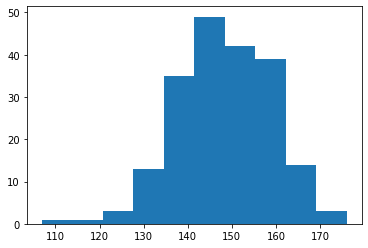

In [64]:
plt.hist(list(dict(g_b.degree()).values()))